# Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

## Lets Load the important libraris

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Lets import our datset

In [5]:
data=pd.read_csv('censusdataset.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Information about the data

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous. Final weight on cps files

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Target- salary <=50 or >=50

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18218 entries, 0 to 18217
Data columns (total 15 columns):
age               18218 non-null int64
workclass         18218 non-null object
fnlwgt            18218 non-null int64
education         18218 non-null object
education-num     18218 non-null int64
marital-status    18218 non-null object
occupation        18218 non-null object
relationship      18218 non-null object
race              18218 non-null object
sex               18218 non-null object
capital-gain      18218 non-null int64
capital-loss      18218 non-null int64
hours-per-week    18218 non-null int64
native-country    18218 non-null object
Target            18218 non-null object
dtypes: int64(6), object(9)
memory usage: 2.1+ MB


In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Target            0
dtype: int64

In [8]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'),
 dtype('O'): Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'native-country', 'Target'],
       dtype='object')}

In [9]:
data_cat=data[['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'native-country', 'Target']].copy()

In [10]:
data_int=data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week']].copy()

In [11]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [13]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary'], dtype=object)

From the above we can see that their are no null values but their are "?" in our categorical variables, so we have to treat them, so in workclass we can replace "?" with "labour", as people might do multiple jobs to meet the daily ends, and for occupation we can replace "?" with "Other-service", and for native-country we can replace "?" with "Outlying-US(Guam-USVI-etc)"  

In [14]:
data['workclass']=data['workclass'].replace({" ?":"Labour"})

In [15]:
data['occupation']=data['occupation'].replace({' ?':' Other-service'})

In [16]:
data['native-country']=data['native-country'].replace({' ?':' Outlying-US(Guam-USVI-etc)'})

In [17]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'Labour', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [18]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [19]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India',
       ' Outlying-US(Guam-USVI-etc)', ' Mexico', ' South', ' Puerto-Rico',
       ' Honduras', ' England', ' Canada', ' Germany', ' Iran',
       ' Philippines', ' Italy', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' China', ' Japan', ' Yugoslavia', ' Peru', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary'], dtype=object)

In [20]:
data['Target'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Statistical Summary

In [21]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,18218.000000,1.821800e+04,18218.00000,18218.000000,18218.000000,18218.000000
mean,38.561093,1.900938e+05,10.09293,1051.947470,88.225930,40.406082
std,13.617317,1.057694e+05,2.55782,7301.930556,403.374907,12.246695
min,17.000000,1.228500e+04,1.00000,0.000000,0.000000,1.000000
25%,28.000000,1.186642e+05,9.00000,0.000000,0.000000,40.000000
50%,37.000000,1.786730e+05,10.00000,0.000000,0.000000,40.000000
75%,47.000000,2.377305e+05,12.00000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.00000,99999.000000,4356.000000,99.000000


From the above we can see that there is a significant difference between mean and max capital-gain,capital-loss and hours-per-week.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FDCB41A88>,
      dtype=object)

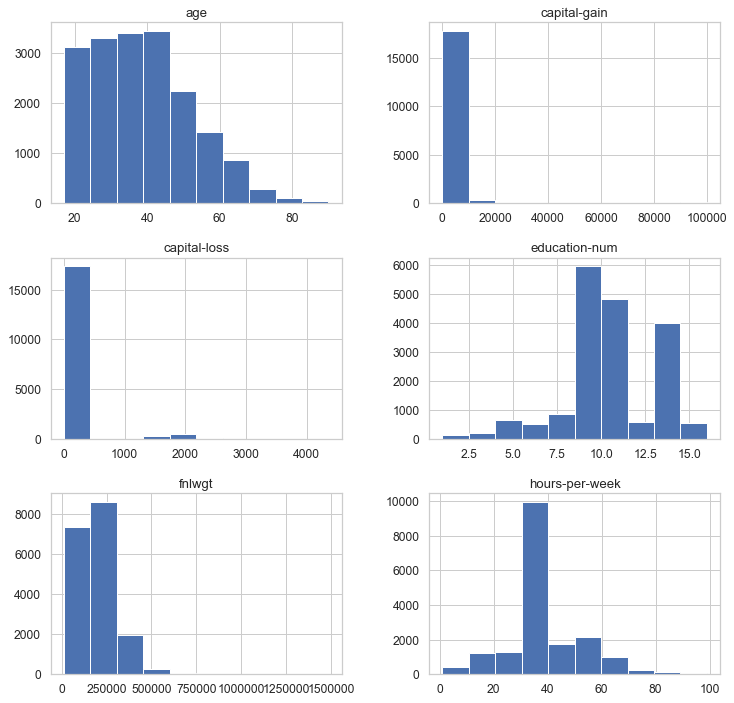

In [35]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1)
data.hist(figsize=(12,12))

From the above we can see that most of our data are negatively and postively skewed

In [22]:
data.skew()

age                0.572323
fnlwgt             1.537035
education-num     -0.301974
capital-gain      12.105545
capital-loss       4.547967
hours-per-week     0.197216
dtype: float64

From the above we can see high skewness is observed in fnlwgt,capital-gain,capital-loss as fnlwgt is not an important feature we will drop that, and for other we will normalize data after spliting.

## Lets do the EDA

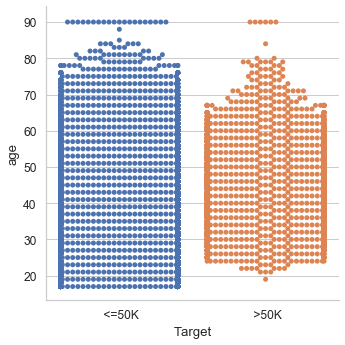

In [56]:
sns.catplot(x='Target',y='age',data=data,kind='swarm')

From the above we can see that the people with age more 22 have higher income more than 50K, few hardworking and creative people have income more than 50K.

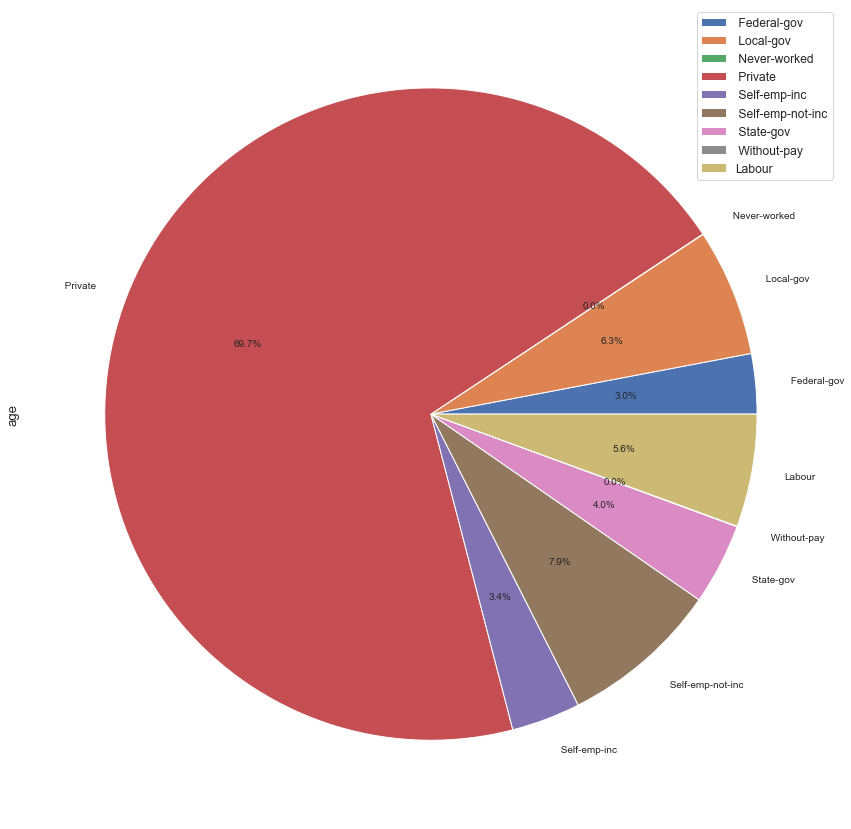

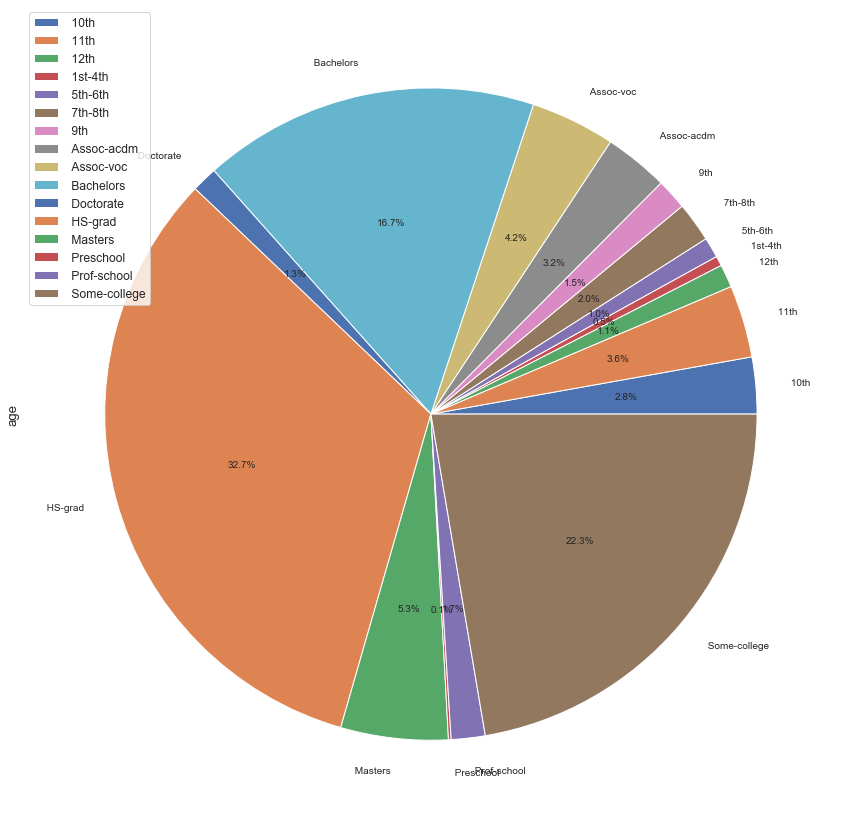

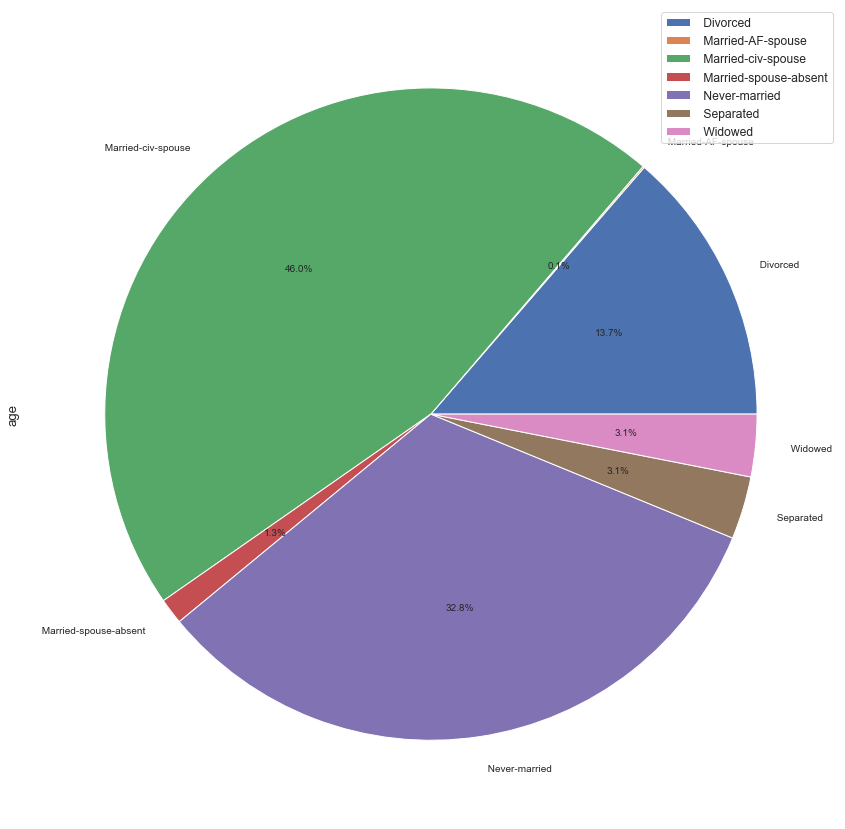

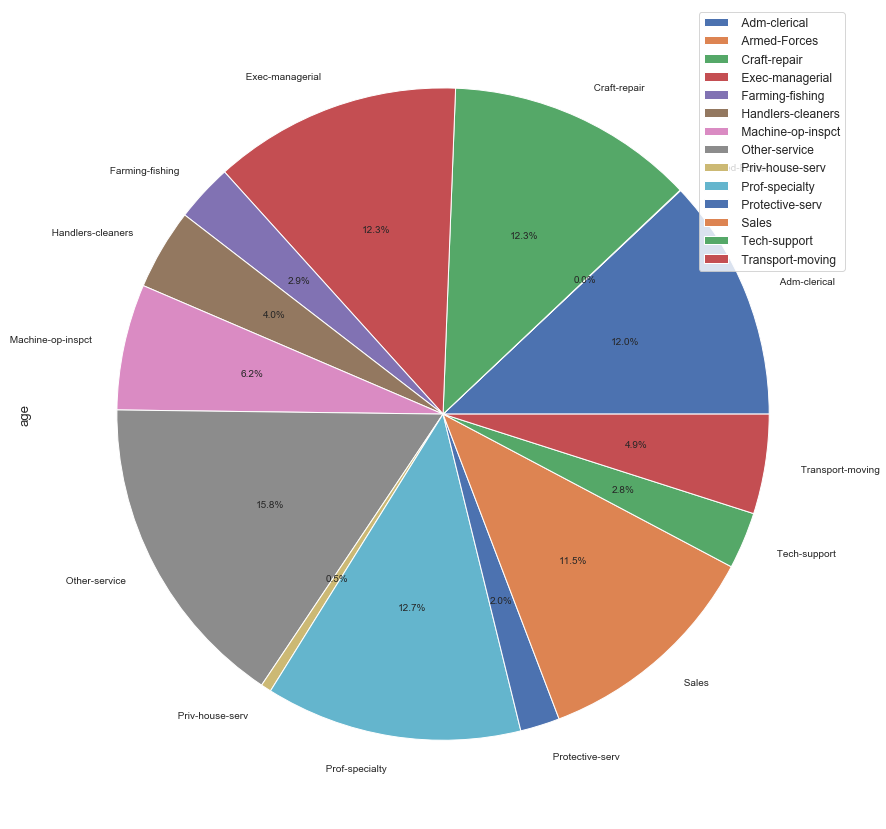

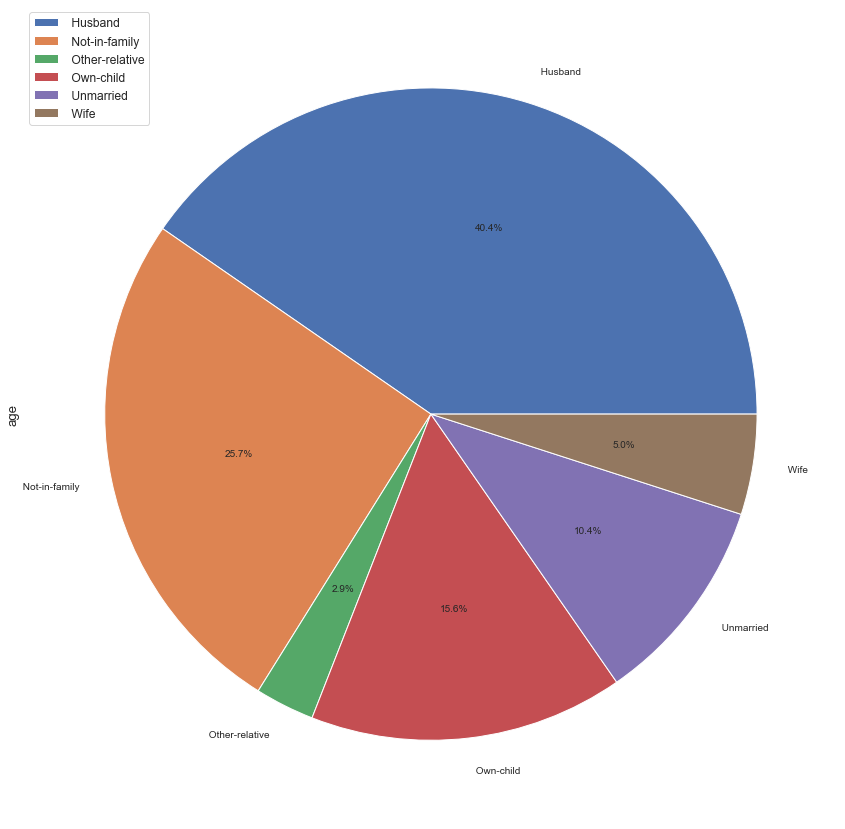

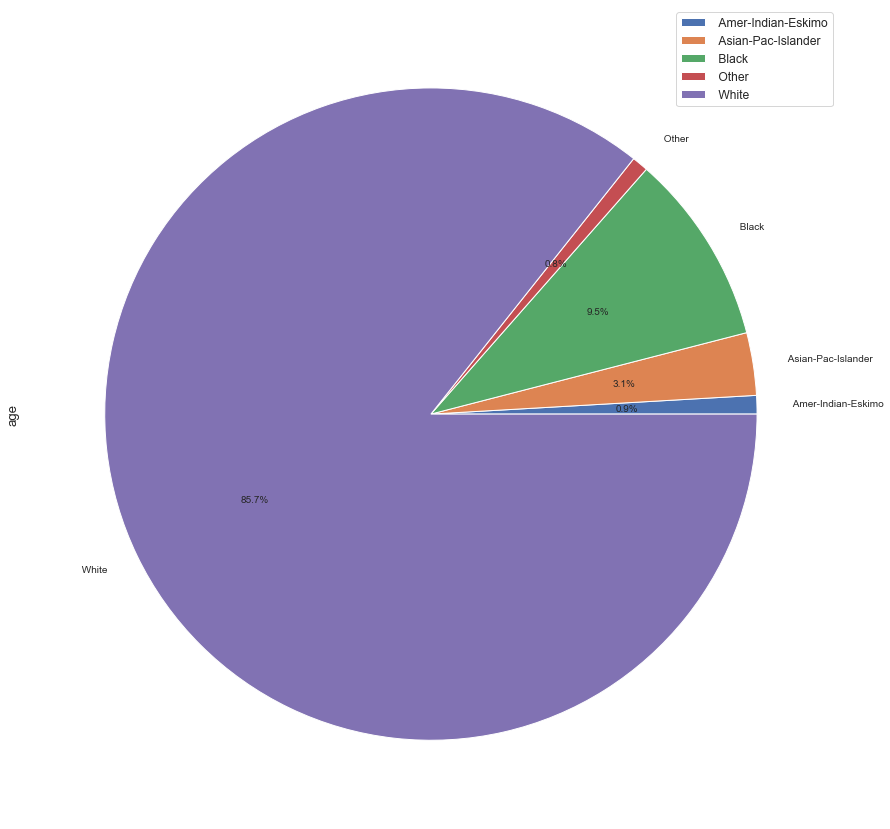

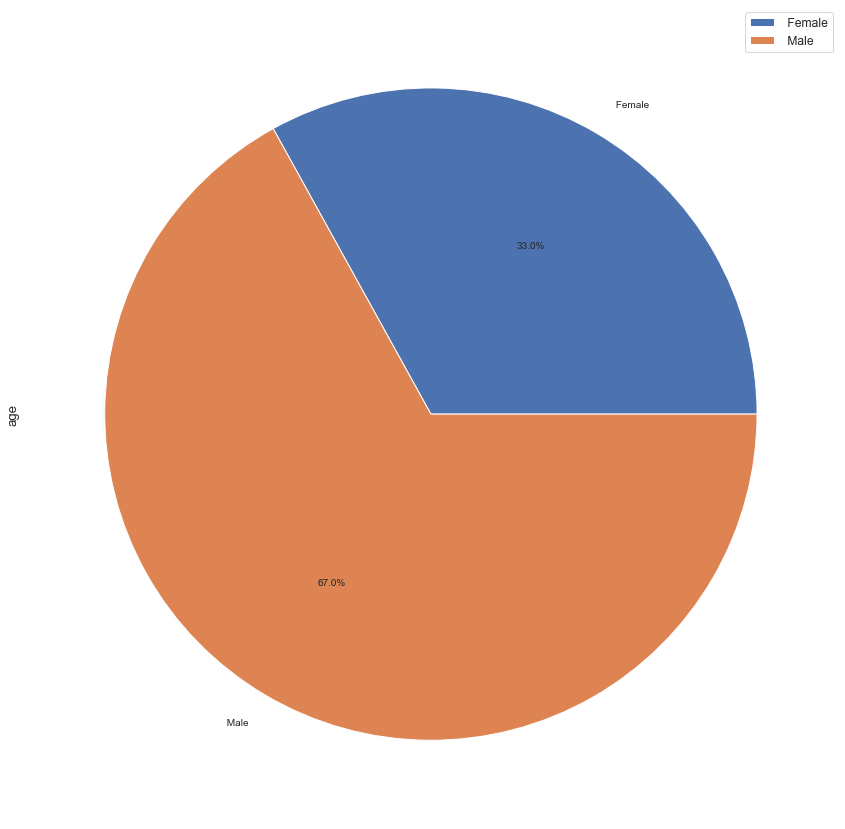

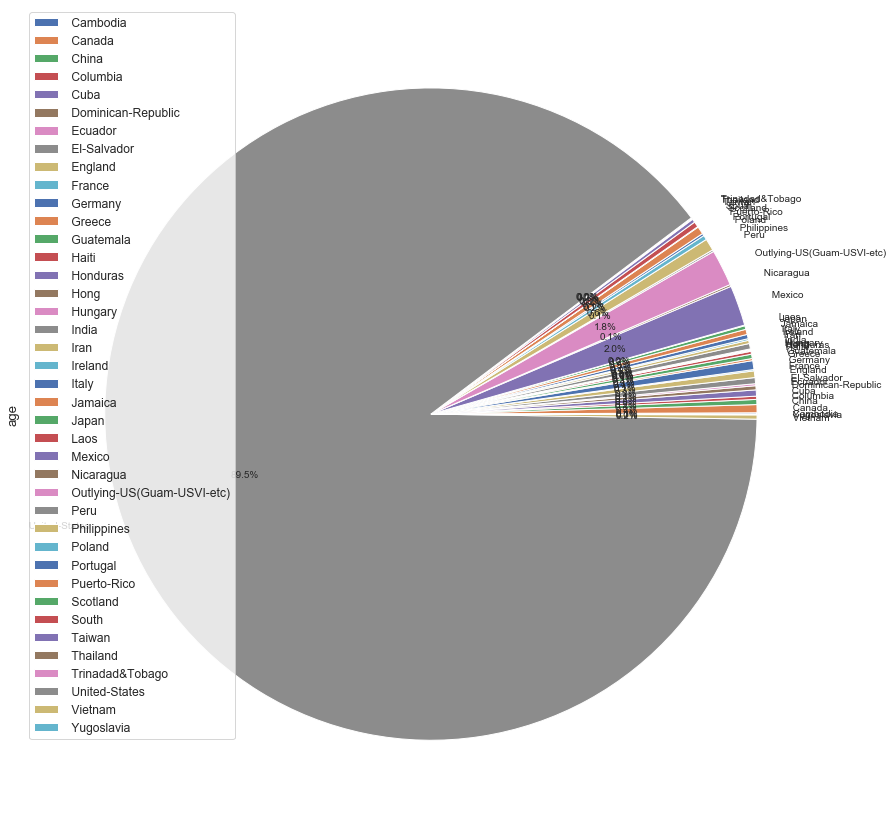

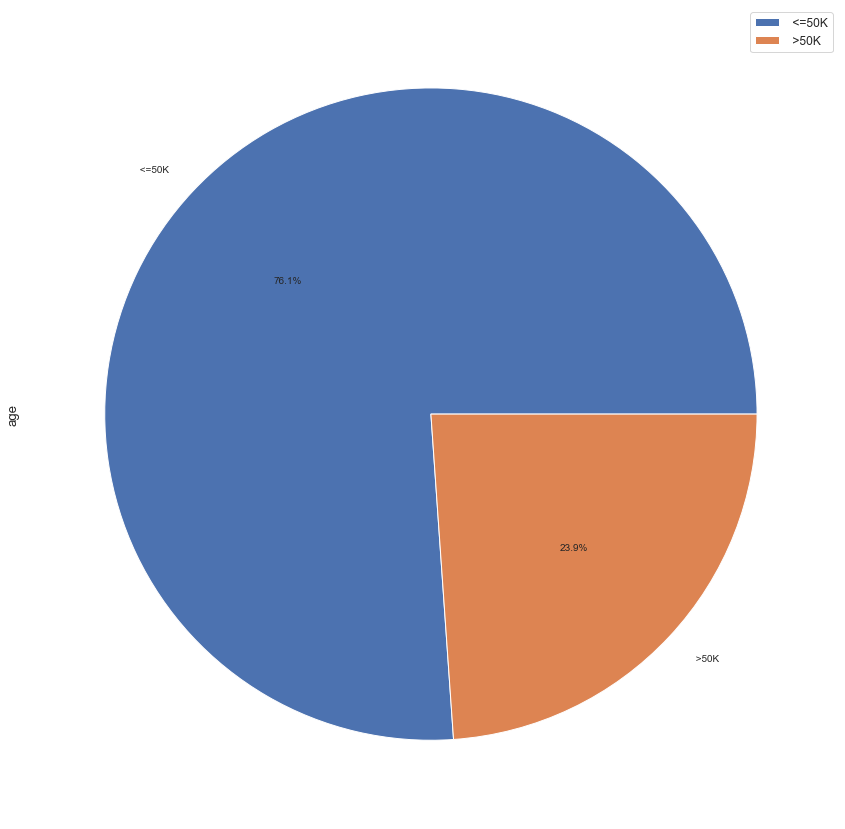

In [73]:
   for feature in data_cat:
        pie = data.groupby(feature).count().plot(kind='pie', 
                                            y='age', 
                                            autopct='%1.1f%%', 
                                            figsize=(15, 15), 
                                            fontsize=10)

From the above we can see a lots of details like males have high majority as working and in most of the families Husbands are working, and majority of races are white, most of the peoples are married and most of the people's occupations are other services, most of the peoples are HS-grad, most of the people are working for private companies.

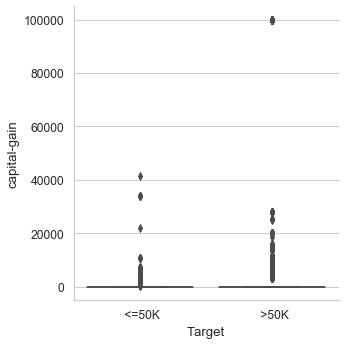

In [77]:
sns.catplot(x="Target",y="capital-gain",data=data,kind='box')

From the above we can see that most of the peoples who have income more that 50K have higher capital gain compared to people with less than 50K

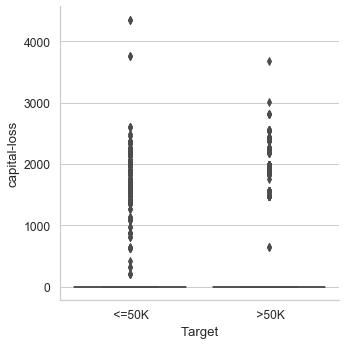

In [78]:
sns.catplot(x="Target",y="capital-loss",data=data,kind='box')

From the above we can see that most of the peoples who have income more that 50K have lower capital loss compared to people with less than 50K

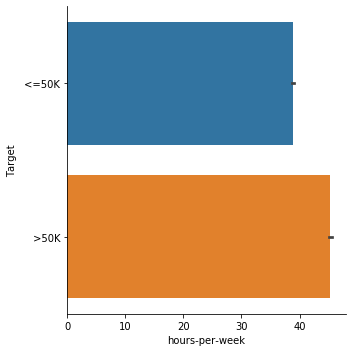

In [19]:
sns.catplot(x="hours-per-week",y="Target",data=data,kind='bar')

From the above we can see that most of the people who are earning more than 50K are spending more than 40 hrs per week.

## Lets level encode the categoreical variables

In [23]:
data.drop(['fnlwgt'],axis=1,inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Target']=LE.fit_transform(data['Target'])
data['sex']=LE.fit_transform(data['sex'])
data['native-country']=LE.fit_transform(data['native-country'])

In [25]:
data['workclass'] =pd.get_dummies(data['workclass'], drop_first=True) 
data['education'] =pd.get_dummies(data['education'], drop_first=True)
data['marital-status'] =pd.get_dummies(data['marital-status'], drop_first=True)
data['occupation'] =pd.get_dummies(data['occupation'], drop_first=True)
data['relationship'] =pd.get_dummies(data['relationship'], drop_first=True)
data['race'] =pd.get_dummies(data['race'], drop_first=True)

In [26]:
data.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,39,0,0,13,0,0,1,0,1,2174,0,40,37,0
1,50,0,0,13,0,0,0,0,1,0,0,13,37,0
2,38,0,0,9,0,0,1,0,1,0,0,40,37,0
3,53,0,1,7,0,0,0,0,1,0,0,40,37,0
4,28,0,0,13,0,0,0,0,0,0,0,40,4,0
5,37,0,0,14,0,0,0,0,0,0,0,40,37,0
6,49,0,0,5,0,0,1,0,0,0,0,16,21,0
7,52,0,0,9,0,0,0,0,1,0,0,45,37,1
8,31,0,0,14,0,0,1,0,0,14084,0,50,37,1
9,42,0,0,13,0,0,0,0,1,5178,0,40,37,1


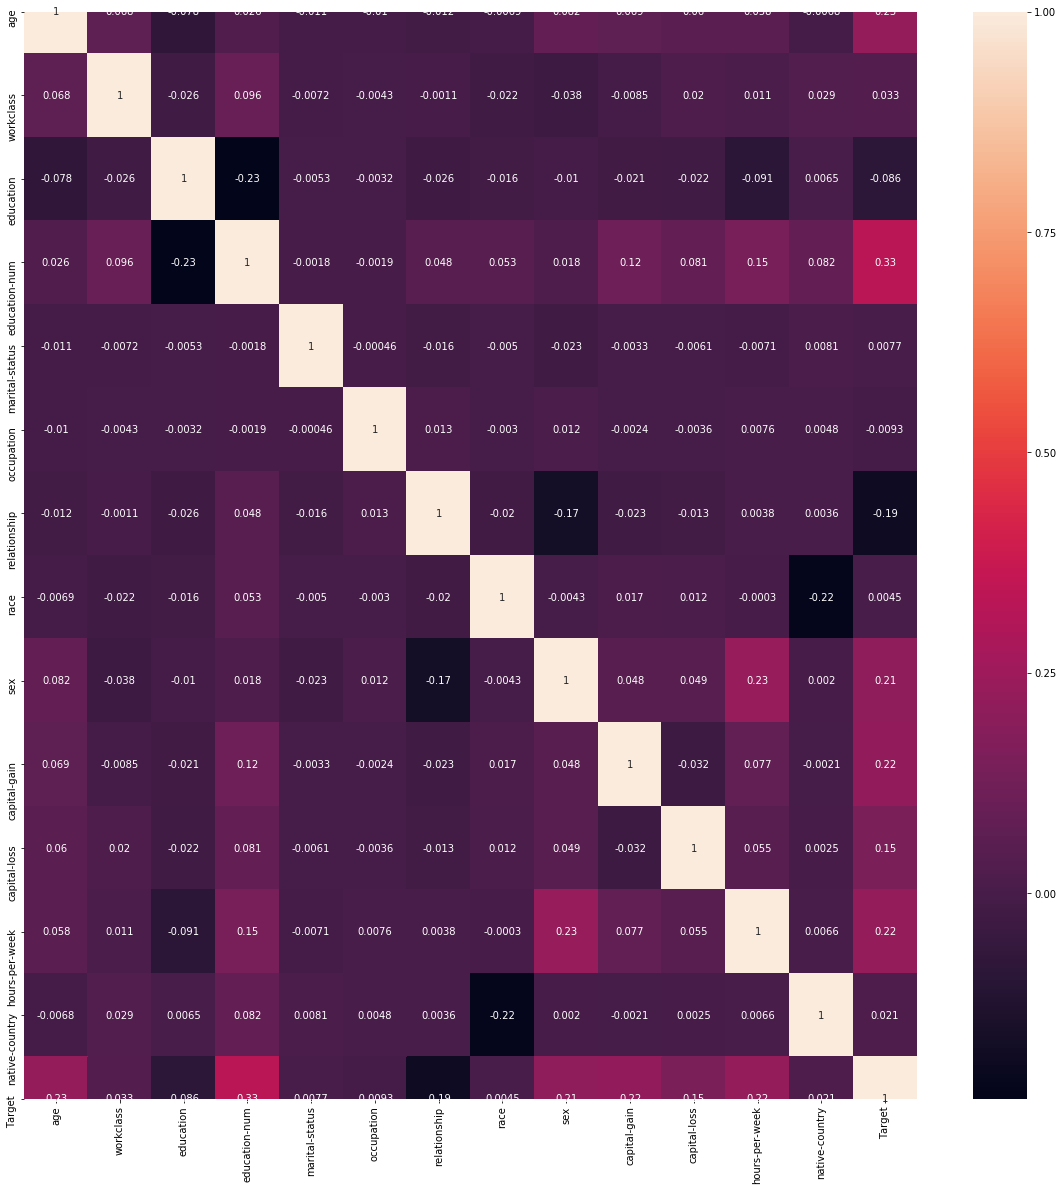

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

From the above map we can see that the most of the independents variables are positively correlated with our dependent variables

In [27]:
x=data.iloc[:,:-1]
x.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,0,0,13,0,0,1,0,1,2174,0,40,37
1,50,0,0,13,0,0,0,0,1,0,0,13,37
2,38,0,0,9,0,0,1,0,1,0,0,40,37
3,53,0,1,7,0,0,0,0,1,0,0,40,37
4,28,0,0,13,0,0,0,0,0,0,0,40,4


In [28]:
y=data['Target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

## Lets Scale and split our test and train data

In [29]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=56)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((14574, 13), (3644, 13), (14574,), (3644,))

## Lets Implement our ML ALogrithms

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [33]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=56)
GBC=GradientBoostingClassifier(random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [34]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.818880351262349


Cross_Val_Score =  0.8162265297173892


roc_auc_score =  0.7063399813956664


classification_report
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      2810
           1       0.63      0.50      0.56       834

    accuracy                           0.82      3644
   macro avg       0.75      0.71      0.72      3644
weighted avg       0.81      0.82      0.81      3644



[[2568  242]
 [ 418  416]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



---------------------> SVC <----------------------


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', 

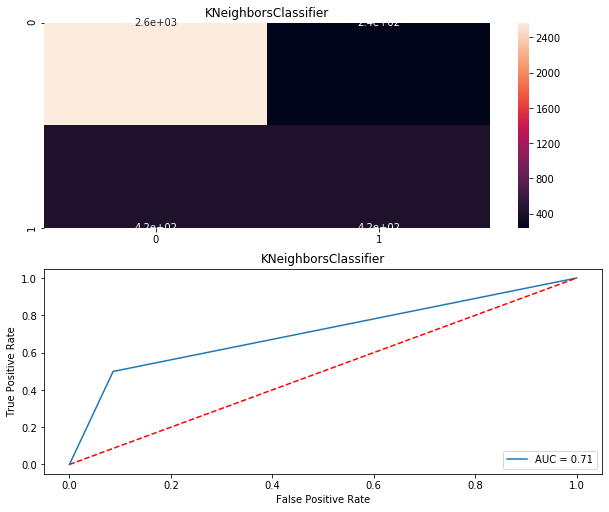

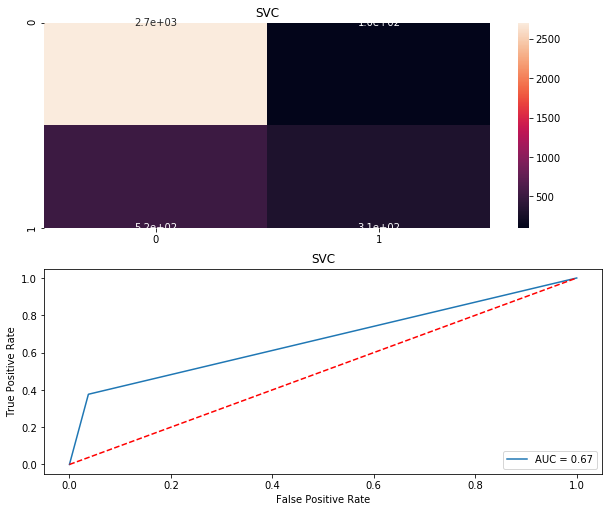

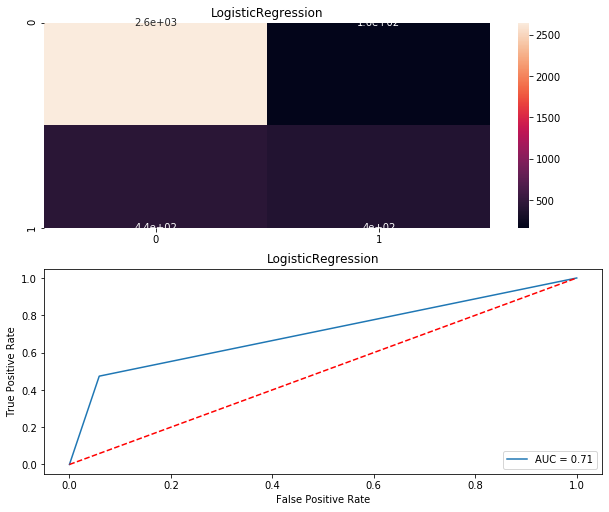

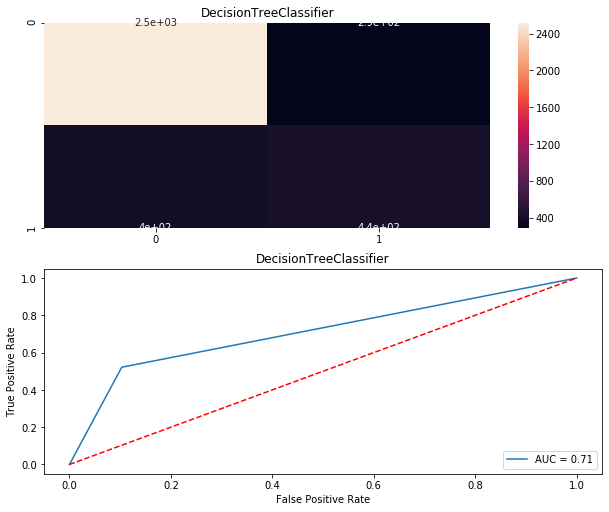

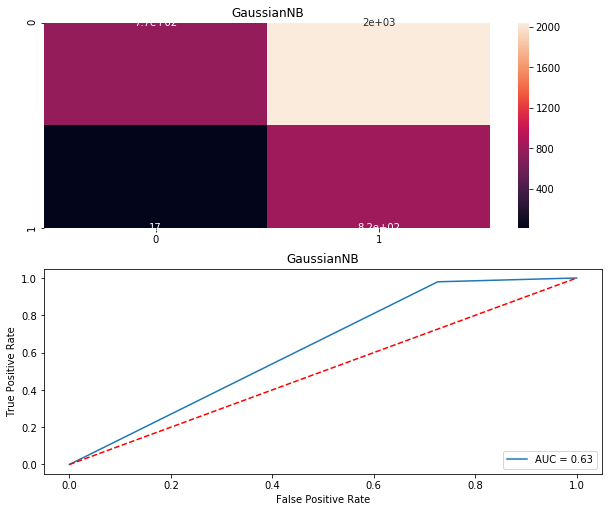

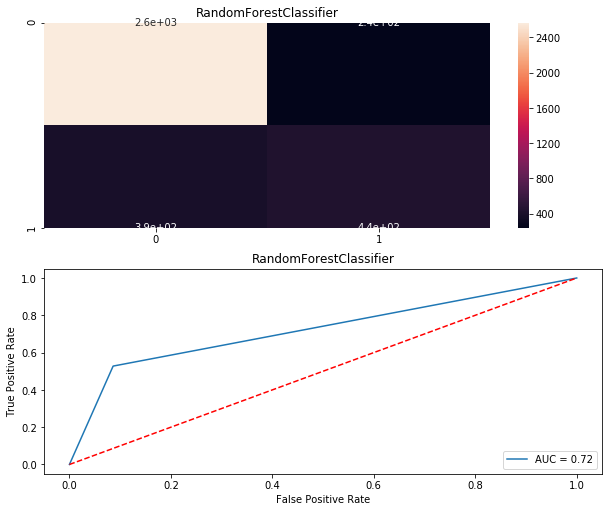

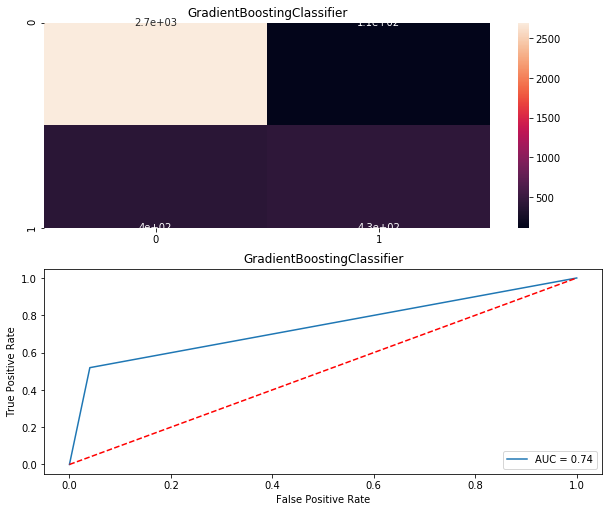

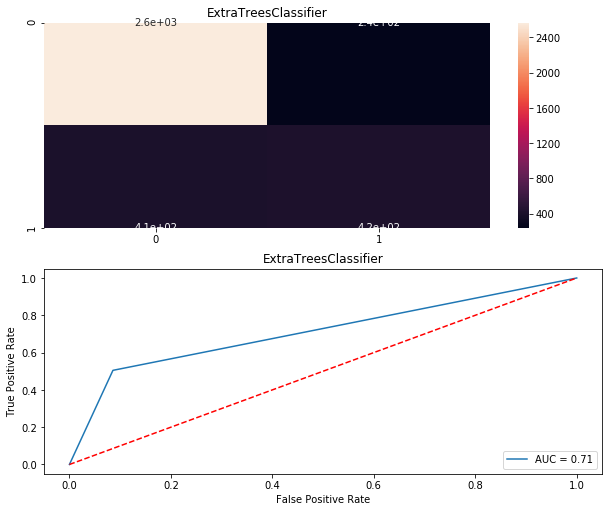

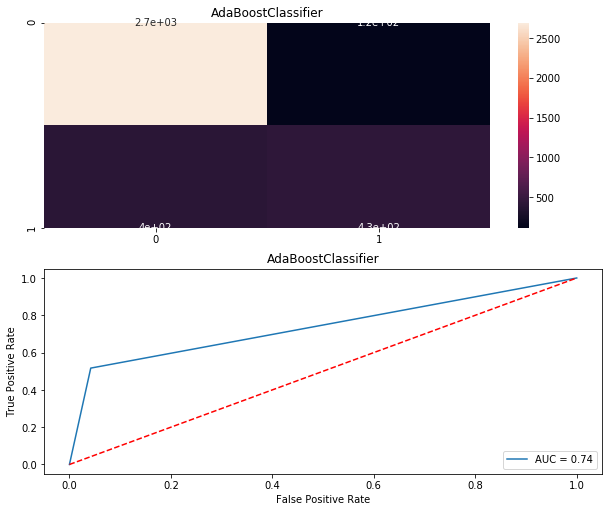

In [35]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [36]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,0.818880,0.816227,0.706340
1,SVC,0.828485,0.822923,0.669566
2,LogisticRegression,0.834248,0.826765,0.707451
3,DecisionTreeClassifier,0.810922,0.812329,0.709190
4,GaussianNB,0.435510,0.441813,0.626819
5,RandomForestClassifier,0.825467,0.826656,0.720728
6,GradientBoostingClassifier,0.858946,0.853004,0.739486
7,ExtraTreesClassifier,0.820527,0.820507,0.709516
8,AdaBoostClassifier,0.857025,0.846581,0.737397


Most of models are performing well but not giving accuracy is the highest and crossval score is also highest, so we choose GradientBoostingClassifier as my final model as the accuracy and cross val score is high

In [41]:
from sklearn.externals import joblib
joblib.dump(GBC,'Census_prediction.obj')

['Census_prediction.obj']

In [42]:
model=joblib.load('Census_prediction.obj')

In [44]:
predictions=model.predict(x_test)

In [46]:
pre = pd.DataFrame(predictions)
pre.columns = ["prediction"]
pre.to_csv("Census_prediction_prediction.csv")